# K MEANS CLUSTERING

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from feature_engine.outliers import Winsorizer
from sklearn.cluster import KMeans
from sklearn import metrics

In [2]:
%matplotlib inline

In [3]:
df = pd.read_csv("C:/Users/Atharv/Downloads/ERFOLG PYTHON LAB/EX2/clustering_data.csv")

In [4]:
df.head(3).transpose()

,0,1,2
ID,1.00,2.00,3.00
alcohol,13.72,13.94,12.20
malic_acid,1.43,1.73,3.03
ash,2.50,2.27,2.32
alcalinity_of_ash,16.70,17.40,19.00
magnesium,108.00,108.00,96.00
total_phenols,3.40,2.88,1.25
flavanoids,3.67,3.54,0.49
nonflavanoid_phenols,0.19,0.32,0.40
proanthocyanins,2.04,2.08,0.73


In [5]:
df.shape

(178, 14)

In [6]:
df.isnull().sum()

ID                              0
alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
dtype: int64

In [7]:
df.dtypes

ID                                int64
alcohol                         float64
malic_acid                      float64
ash                             float64
alcalinity_of_ash               float64
magnesium                       float64
total_phenols                   float64
flavanoids                      float64
nonflavanoid_phenols            float64
proanthocyanins                 float64
color_intensity                 float64
hue                             float64
od280/od315_of_diluted_wines    float64
proline                         float64
dtype: object

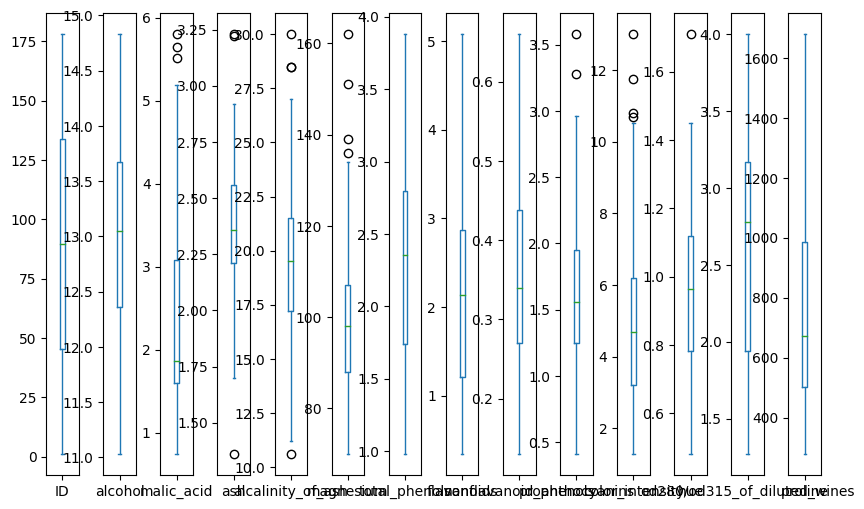

In [8]:
df.plot(kind = 'box', subplots = True, sharey = False, figsize = (10, 6)) 
# increase spacing between subplots
plt.subplots_adjust(wspace = 0.75) # ws is the width of the padding between subplots, as a fraction of the average Axes width.
plt.show()

In [9]:
# Winsorization 
winsor = Winsorizer(capping_method = 'iqr', # choose IQR rule boundary
                          tail = 'both', # cap left, right or both tails 
                          fold = 1.5,
                          variables = ['malic_acid'])

df['malic_acid'] = winsor.fit_transform(df[['malic_acid']]) # this is replacing the outliers to cap values


In [10]:
winsor = Winsorizer(capping_method = 'iqr', # choose IQR rule boundary
                          tail = 'both', # cap left, right or both tails 
                          fold = 1.5,
                          variables = ['ash'])

df['ash'] = winsor.fit_transform(df[['ash']]) # this is replacing the outliers to cap values


In [11]:
winsor = Winsorizer(capping_method = 'iqr', # choose IQR rule boundary
                          tail = 'both', # cap left, right or both tails 
                          fold = 1.5,
                          variables = ['alcalinity_of_ash'])

df['alcalinity_of_ash'] = winsor.fit_transform(df[['alcalinity_of_ash']]) # this is replacing the outliers to cap values

In [12]:
winsor = Winsorizer(capping_method = 'iqr', # choose IQR rule boundary
                          tail = 'both', # cap left, right or both tails 
                          fold = 1.5,
                          variables = ['magnesium'])

df['magnesium'] = winsor.fit_transform(df[['magnesium']]) # this is replacing the outliers to cap values

In [13]:
winsor = Winsorizer(capping_method = 'iqr', # choose IQR rule boundary
                          tail = 'both', # cap left, right or both tails 
                          fold = 1.5,
                          variables = ['color_intensity'])

df['color_intensity'] = winsor.fit_transform(df[['color_intensity']]) # this is replacing the outliers to cap values

In [14]:
winsor = Winsorizer(capping_method = 'iqr', # choose IQR rule boundary
                          tail = 'both', # cap left, right or both tails 
                          fold = 1.5,
                          variables = ['hue'])

df['hue'] = winsor.fit_transform(df[['hue']]) # this is replacing the outliers to cap values

In [15]:
winsor = Winsorizer(capping_method = 'iqr', # choose IQR rule boundary
                          tail = 'both', # cap left, right or both tails 
                          fold = 1.5,
                          variables = ['proanthocyanins'])

df['proanthocyanins'] = winsor.fit_transform(df[['proanthocyanins']]) # this is replacing the outliers to cap values

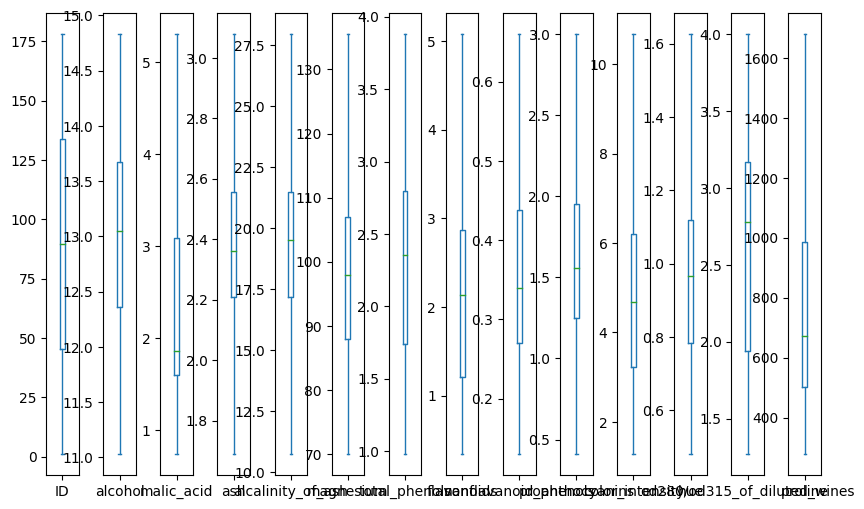

In [16]:
df.plot(kind = 'box', subplots = True, sharey = False, figsize = (10, 6)) #sharey = True shares the Y axis across all plots


# increase spacing between subplots
plt.subplots_adjust(wspace = 0.75) 
plt.show()  

In [17]:
def norm_func(i):
  x =(i - i.min()) / (i.max() - i.min())
  return(x)

In [18]:
df_norm = norm_func(df.iloc[:, 1:14])

In [19]:
df_norm

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,0.707895,0.151233,0.583633,0.345930,0.580153,0.834483,0.702532,0.113208,0.629344,0.587859,0.357688,0.586081,0.718260
1,0.765789,0.216986,0.418165,0.386628,0.580153,0.655172,0.675105,0.358491,0.644788,0.811502,0.558342,0.670330,0.700428
2,0.307895,0.501918,0.454137,0.479651,0.396947,0.093103,0.031646,0.509434,0.123552,0.449414,0.157034,0.205128,0.165478
3,0.484211,0.848219,0.569245,0.625000,0.244275,0.248276,0.065401,0.641509,0.173745,0.678381,0.052345,0.216117,0.247504
4,0.647368,0.624658,0.360612,0.508721,0.274809,0.220690,0.029536,0.849057,0.181467,0.470714,0.287895,0.201465,0.215407
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.665789,0.216986,0.554856,0.566860,0.702290,0.682759,0.514768,0.132075,0.787645,0.529286,0.436205,0.644689,0.600571
174,1.000000,0.197260,0.346223,0.188953,0.412214,0.627586,0.556962,0.301887,0.606178,0.417465,0.523446,0.578755,0.547076
175,0.539474,0.692603,0.482914,0.625000,0.656489,0.148276,0.221519,0.396226,0.281853,0.864750,0.078517,0.021978,0.194009
176,0.486842,0.493151,0.511691,0.537791,0.519084,0.110345,0.185654,0.207547,0.162162,0.438765,0.226827,0.054945,0.179743


In [20]:
###### scree plot or elbow curve ############
TWSS = []
k = list(range(2, 9))

for i in k:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(df_norm)
    TWSS.append(kmeans.inertia_)

TWSS

C:\Users\Atharv\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Atharv\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Atharv\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Atharv\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the va

[77.42927528119358,
 58.921471292501465,
 54.22237277626119,
 51.176459562397056,
 48.594924646833356,
 45.98852950392775,
 43.339590363337706]

Text(0, 0.5, 'total_within_SS')

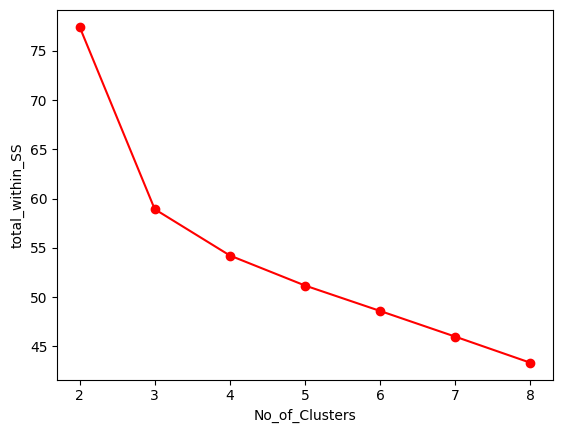

In [21]:
plt.plot(k, TWSS, 'ro-'); plt.xlabel("No_of_Clusters"); plt.ylabel("total_within_SS")

C:\Users\Atharv\AppData\Local\Temp\ipykernel_2272\3847259651.py:13: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


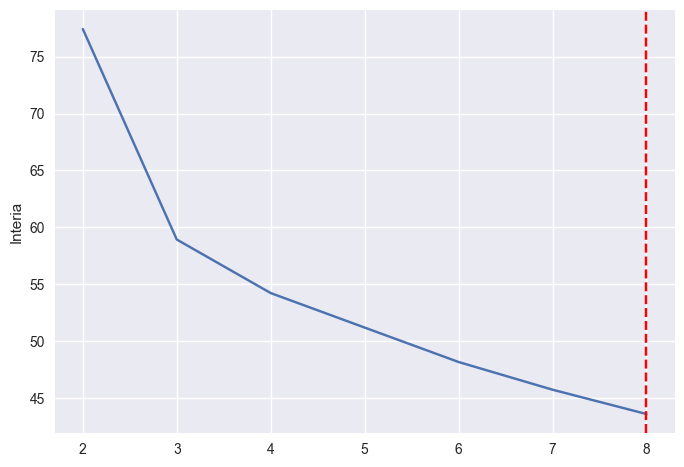

In [23]:
List = []

for k in range(2, 9):
    kmeans = KMeans(n_clusters = k, init = "random", max_iter = 30, random_state = 1, n_init = 10) 
    kmeans.fit(df_norm)
    List.append(kmeans.inertia_)

       
from kneed import KneeLocator
kl = KneeLocator(range(2, 9), List, curve = 'convex') 

kl.elbow
plt.style.use("seaborn")
plt.plot(range(2, 9), List)
plt.xticks(range(2, 9))
plt.ylabel("Interia")
plt.axvline(x = kl.elbow, color = 'r', label = 'axvline - full height', ls = '--')
plt.show()

In [24]:
model = KMeans(n_clusters = 3)

yy = model.fit(df_norm)

C:\Users\Atharv\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [25]:
model.labels_

array([1, 1, 0, 0, 0, 1, 0, 2, 0, 2, 2, 2, 0, 2, 1, 0, 1, 0, 0, 2, 1, 2,
       0, 1, 2, 0, 2, 1, 1, 0, 2, 1, 2, 1, 1, 2, 2, 2, 0, 2, 2, 0, 1, 2,
       1, 0, 2, 2, 2, 1, 1, 2, 0, 2, 2, 1, 0, 2, 2, 2, 0, 2, 1, 1, 1, 1,
       2, 1, 0, 2, 1, 1, 0, 1, 2, 1, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 2, 2,
       2, 1, 2, 2, 1, 0, 2, 1, 2, 0, 1, 1, 2, 1, 1, 0, 2, 1, 0, 2, 1, 2,
       2, 1, 0, 1, 0, 2, 2, 0, 1, 2, 2, 1, 2, 0, 0, 0, 2, 1, 2, 0, 1, 1,
       0, 0, 2, 1, 2, 1, 1, 0, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 2, 1,
       2, 1, 2, 0, 0, 0, 0, 2, 0, 2, 1, 2, 1, 1, 0, 2, 1, 2, 2, 1, 1, 0,
       0, 0])

In [26]:
mb = pd.Series(model.labels_) 

In [27]:
df['clust'] = mb # creating a  new column and assigning it to new column 

In [28]:
df.head()

,ID,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,clust
0,1,13.72,1.43,2.50,16.7,108.0,3.40,3.67,0.19,2.04,6.80,0.89,2.87,1285.0,1
1,2,13.94,1.73,2.27,17.4,108.0,2.88,3.54,0.32,2.08,8.90,1.12,3.10,1260.0,1
2,3,12.20,3.03,2.32,19.0,96.0,1.25,0.49,0.40,0.73,5.50,0.66,1.83,510.0,0
3,4,12.87,4.61,2.48,21.5,86.0,1.70,0.65,0.47,0.86,7.65,0.54,1.86,625.0,0
4,5,13.49,3.59,2.19,19.5,88.0,1.62,0.48,0.58,0.88,5.70,0.81,1.82,580.0,0


In [29]:
# Cluster Evaluation

In [30]:
metrics.silhouette_score(df_norm, model.labels_)

0.29100612735272696

In [31]:
from sklearn.metrics import silhouette_score

silhouette_coefficients = []

for k in range (2, 11):
    kmeans = KMeans(n_clusters = k, init = "random", random_state = 1)
    kmeans.fit(df_norm)
    score = silhouette_score(df_norm, kmeans.labels_)
    k = k
    Sil_coff = score
    silhouette_coefficients.append([k, Sil_coff])

C:\Users\Atharv\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Atharv\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Atharv\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Atharv\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the va

In [32]:
silhouette_coefficients

[[2, 0.28403926819294956],
 [3, 0.29100612735272696],
 [4, 0.25291042335828684],
 [5, 0.2300531516487065],
 [6, 0.1942298273065114],
 [7, 0.1922769117323499],
 [8, 0.15040663331486462],
 [9, 0.19383106331381217],
 [10, 0.14848304877372304]]

In [33]:
 # Shilhouette Coeffficients shows, the number of clusters `k = 3` as the best value

In [34]:
submission = pd.DataFrame({"ID" : df['ID'], "Cluster" : df['clust']})
submission.to_csv("ERFOLG_group01_exercise2.csv", index=False)
import os
os.getcwd()

'C:\\Users\\Atharv\\Downloads\\ERFOLG PYTHON LAB\\EX2'

In [35]:
df

,ID,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,clust
0,1,13.72,1.4300,2.50,16.7,108.0,3.40,3.67,0.19,2.04,6.80,0.89,2.87,1285.0,1
1,2,13.94,1.7300,2.27,17.4,108.0,2.88,3.54,0.32,2.08,8.90,1.12,3.10,1260.0,1
2,3,12.20,3.0300,2.32,19.0,96.0,1.25,0.49,0.40,0.73,5.50,0.66,1.83,510.0,0
3,4,12.87,4.6100,2.48,21.5,86.0,1.70,0.65,0.47,0.86,7.65,0.54,1.86,625.0,0
4,5,13.49,3.5900,2.19,19.5,88.0,1.62,0.48,0.58,0.88,5.70,0.81,1.82,580.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,174,13.56,1.7300,2.46,20.5,116.0,2.96,2.78,0.20,2.45,6.25,0.98,3.03,1120.0,1
174,175,14.83,1.6400,2.17,14.0,97.0,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045.0,1
175,176,13.08,3.9000,2.36,21.5,113.0,1.41,1.39,0.34,1.14,9.40,0.57,1.33,550.0,0
176,177,12.88,2.9900,2.40,20.0,104.0,1.30,1.22,0.24,0.83,5.40,0.74,1.42,530.0,0


# HIERARCHIAL CLUSTERING 

In [36]:
# Libraries for creating dendrogram 
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering 
import matplotlib.pyplot as plt

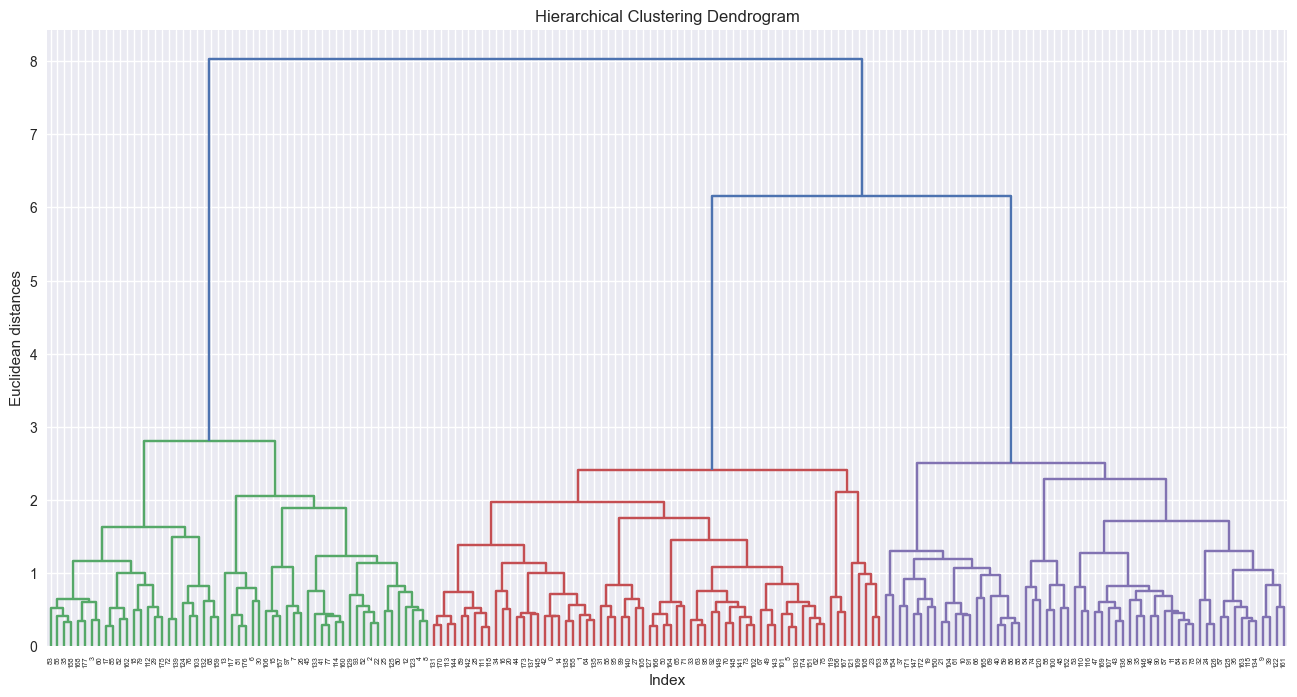

In [37]:
plt.figure(1, figsize = (16, 8))
tree_plot = dendrogram(linkage(df_norm, method  = "ward"))

plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Euclidean distances')
plt.show()

In [38]:
# Applying AgglomerativeClustering choosing 3 as clusters from the above dendrogram
hc1 = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'complete')

y_hc1 = hc1.fit_predict(df_norm)
y_hc1

C:\Users\Atharv\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([0, 0, 1, 1, 1, 0, 1, 2, 1, 0, 0, 2, 1, 2, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 2, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       2, 0, 1, 0, 1, 0, 2, 1, 0, 2, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 2, 1, 0, 0, 2, 0, 0, 0, 1,
       1, 1], dtype=int64)

In [39]:
# Applying AgglomerativeClustering choosing 3 as clusters from the above dendrogram
hc2 = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'average')

y_hc2 = hc2.fit_predict(df_norm)
y_hc2

C:\Users\Atharv\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)

In [40]:
# Applying AgglomerativeClustering choosing 3 as clusters from the above dendrogram
hc3 = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'single')

y_hc3 = hc3.fit_predict(df_norm)
y_hc3

C:\Users\Atharv\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)

In [41]:
hc1.labels_   # Refering to the results obtained from linkage = 'complete' method

array([0, 0, 1, 1, 1, 0, 1, 2, 1, 0, 0, 2, 1, 2, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 2, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       2, 0, 1, 0, 1, 0, 2, 1, 0, 2, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 2, 1, 0, 0, 2, 0, 0, 0, 1,
       1, 1], dtype=int64)

In [42]:
cluster_labels = pd.Series(hc1.labels_)

In [43]:
# Add Cluster labels to orignal Dataset

df['cluster'] = cluster_labels
df.head()

,ID,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,clust,cluster
0,1,13.72,1.43,2.50,16.7,108.0,3.40,3.67,0.19,2.04,6.80,0.89,2.87,1285.0,1,0
1,2,13.94,1.73,2.27,17.4,108.0,2.88,3.54,0.32,2.08,8.90,1.12,3.10,1260.0,1,0
2,3,12.20,3.03,2.32,19.0,96.0,1.25,0.49,0.40,0.73,5.50,0.66,1.83,510.0,0,1
3,4,12.87,4.61,2.48,21.5,86.0,1.70,0.65,0.47,0.86,7.65,0.54,1.86,625.0,0,1
4,5,13.49,3.59,2.19,19.5,88.0,1.62,0.48,0.58,0.88,5.70,0.81,1.82,580.0,0,1


In [44]:
df2 = df.sort_values(by = 'cluster', ascending = True)
df2

,ID,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,clust,cluster
0,1,13.72,1.4300,2.50000,16.70,108.0,3.40,3.67,0.19,2.04,6.80,0.890,2.87,1285.0,1,0
122,123,11.62,1.9900,2.28000,18.00,98.0,3.02,2.26,0.17,1.35,3.25,1.160,2.96,345.0,2,0
121,122,11.56,2.0500,3.07875,27.95,119.0,3.18,5.08,0.47,1.87,6.00,0.930,3.69,465.0,1,0
120,121,13.05,5.3025,2.13000,21.50,86.0,2.62,2.65,0.30,2.01,2.60,0.730,3.10,380.0,2,0
118,119,13.90,1.6800,2.12000,16.00,101.0,3.10,3.39,0.21,2.14,6.10,0.910,3.33,985.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,111,13.67,1.2500,1.92000,18.00,94.0,2.10,1.79,0.32,0.73,3.80,1.230,2.46,630.0,2,2
30,31,12.29,1.6100,2.21000,20.40,103.0,1.10,1.02,0.37,1.46,3.05,0.906,1.82,870.0,2,2
11,12,12.60,1.3400,1.90000,18.50,88.0,1.45,1.36,0.29,1.35,2.45,1.040,2.77,562.0,2,2
167,168,12.47,1.5200,2.20000,19.00,135.5,2.50,2.27,0.32,3.00,2.60,1.160,2.63,937.0,1,2


In [45]:
# Aggregate by doing mean of each cluster
df2.iloc[:, 2:9].groupby(df2.cluster).mean()

,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols
cluster,,,,,,,
0,2.000285,2.378224,18.956579,98.741228,2.616754,2.640439,0.324211
1,3.335100,2.425600,21.330000,98.640000,1.677200,0.807000,0.450400
2,1.430714,2.062768,17.110714,108.535714,1.882857,1.417857,0.352143


In [46]:
cluster0 = df2.loc[(df2.cluster == 0), :]
cluster0

,ID,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,clust,cluster
0,1,13.72,1.4300,2.50000,16.70,108.0,3.40,3.67,0.19,2.04,6.80,0.89,2.87,1285.0,1,0
122,123,11.62,1.9900,2.28000,18.00,98.0,3.02,2.26,0.17,1.35,3.25,1.16,2.96,345.0,2,0
121,122,11.56,2.0500,3.07875,27.95,119.0,3.18,5.08,0.47,1.87,6.00,0.93,3.69,465.0,1,0
120,121,13.05,5.3025,2.13000,21.50,86.0,2.62,2.65,0.30,2.01,2.60,0.73,3.10,380.0,2,0
118,119,13.90,1.6800,2.12000,16.00,101.0,3.10,3.39,0.21,2.14,6.10,0.91,3.33,985.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,67,11.79,2.1300,2.78000,27.95,92.0,2.13,2.24,0.58,1.76,3.00,0.97,2.44,466.0,2,0
67,68,13.20,1.7800,2.14000,11.20,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,1,0
55,56,13.24,3.9800,2.29000,17.50,103.0,2.64,2.63,0.32,1.66,4.36,0.82,3.00,680.0,1,0
54,55,11.46,3.7400,1.82000,19.50,107.0,3.18,2.58,0.24,3.00,2.90,0.75,2.81,562.0,2,0


In [47]:
cluster1 = df2.loc[(df2.cluster == 1), :]
cluster1

,ID,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,clust,cluster
4,5,13.49,3.5900,2.19,19.5,88.0,1.62,0.48,0.58,0.88,5.700000,0.81,1.82,580.0,0,1
2,3,12.20,3.0300,2.32,19.0,96.0,1.25,0.49,0.40,0.73,5.500000,0.66,1.83,510.0,0,1
139,140,13.48,1.6700,2.64,22.5,89.0,2.60,1.10,0.52,2.29,10.670000,0.57,1.78,620.0,0,1
3,4,12.87,4.6100,2.48,21.5,86.0,1.70,0.65,0.47,0.86,7.650000,0.54,1.86,625.0,0,1
175,176,13.08,3.9000,2.36,21.5,113.0,1.41,1.39,0.34,1.14,9.400000,0.57,1.33,550.0,0,1
25,26,12.25,4.7200,2.54,21.0,89.0,1.38,0.47,0.53,0.80,3.850000,0.75,1.27,720.0,0,1
158,159,13.40,3.9100,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.300000,0.70,1.56,750.0,0,1
8,9,13.73,4.3600,2.26,22.5,88.0,1.28,0.47,0.52,1.15,6.620000,0.78,1.75,520.0,0,1
22,23,12.96,3.4500,2.35,18.5,106.0,1.39,0.70,0.40,0.94,5.280000,0.68,1.75,675.0,0,1
6,7,12.86,1.3500,2.32,18.0,122.0,1.51,1.25,0.21,0.94,4.100000,0.76,1.29,630.0,0,1


In [48]:
cluster2 = df2.loc[(df2.cluster == 2), :]
cluster2

,ID,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,clust,cluster
13,14,11.81,2.12,2.74000,21.50,134.0,1.60,0.99,0.14,1.56,2.50,0.950,2.26,625.0,2,2
26,27,12.33,1.10,2.28000,16.00,101.0,2.05,1.09,0.63,0.41,3.27,1.250,1.67,680.0,2,2
171,172,11.84,2.89,2.23000,18.00,112.0,1.72,1.32,0.43,0.95,2.65,0.960,2.52,500.0,2,2
37,38,11.66,1.88,1.92000,16.00,97.0,1.61,1.57,0.34,1.15,3.80,1.230,2.14,428.0,2,2
7,8,13.34,0.94,2.36000,17.00,110.0,2.53,1.30,0.55,0.42,3.17,1.020,1.93,750.0,2,2
119,120,12.21,1.19,1.75000,16.80,135.5,1.85,1.28,0.14,2.50,2.85,1.280,3.07,718.0,2,2
116,117,13.03,0.90,1.71000,16.00,86.0,1.95,2.03,0.24,1.46,4.60,1.190,2.48,392.0,2,2
97,98,12.64,1.36,2.02000,16.80,100.0,2.02,1.41,0.53,0.62,5.75,0.980,1.59,450.0,0,2
53,54,12.37,0.94,1.68875,10.75,88.0,1.98,0.57,0.28,0.42,1.95,1.050,1.82,520.0,2,2
110,111,13.67,1.25,1.92000,18.00,94.0,2.10,1.79,0.32,0.73,3.80,1.230,2.46,630.0,2,2


In [49]:
cluster0.to_csv('Cluster_0.csv', encoding = 'utf-8')
import os
os.getcwd()

'C:\\Users\\Atharv\\Downloads\\ERFOLG PYTHON LAB\\EX2'

In [50]:
cluster1.to_csv('Cluster_1.csv', encoding = 'utf-8')
import os
os.getcwd()

'C:\\Users\\Atharv\\Downloads\\ERFOLG PYTHON LAB\\EX2'

In [51]:
cluster2.to_csv('Cluster_2.csv', encoding = 'utf-8')
import os
os.getcwd()

'C:\\Users\\Atharv\\Downloads\\ERFOLG PYTHON LAB\\EX2'

In [52]:
# COMPARING ALL ALGORITHMS
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score

In [53]:
wine_df = df_norm

In [54]:
# Generate clusters using Agglomerative Hierarchical Clustering

ac = AgglomerativeClustering(3, linkage = 'average')
ac_clusters = ac.fit_predict(wine_df)

In [55]:
# Generate clusters from K-Means
km = KMeans(3)
km_clusters = km.fit_predict(wine_df)

C:\Users\Atharv\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [59]:
# Generate clusters using DBSCAN

db_param_options = [[20, 5], [25, 5], [30, 5], [25, 7], [35, 7], [40, 5]]

for ep, min_sample in db_param_options:
    db = DBSCAN(eps = ep, min_samples = min_sample)
    db_clusters = db.fit_predict(wine_df)
    print("Eps: ", ep, "Min Samples: ", min_sample)

#print("DBSCAN Clustering: ", silhouette_score(wine_df, db_clusters))

Eps:  20 Min Samples:  5
Eps:  25 Min Samples:  5
Eps:  30 Min Samples:  5
Eps:  25 Min Samples:  7
Eps:  35 Min Samples:  7
Eps:  40 Min Samples:  5


In [57]:
# Generate clusters using DBSCAN
#db = DBSCAN(eps = 40, min_samples = 5)
#db_clusters = db.fit_predict(wine_df)# Calculate Silhouette Scores

print("Silhouette Scores for Wine Dataset:\n")

print("Agg Clustering: ", silhouette_score(wine_df, ac_clusters))

print("K-Means Clustering: ", silhouette_score(wine_df, km_clusters))

#print("DBSCAN Clustering: ", silhouette_score(wine_df, db_clusters))

Silhouette Scores for Wine Dataset:

Agg Clustering:  0.11580211650270349
K-Means Clustering:  0.29100612735272696
